### Importação das bibliotecas necessárias

In [113]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io

#algoritmos
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier

#separar dados de treino e teste
from sklearn.model_selection import train_test_split

# exibir metricas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import metrics

Importação dos dados do MS Excel

In [114]:
df = pd.read_excel('/content/arquetipos2.xlsx')

### Verificação inicial dos dados

In [6]:
df.sample(10)

,IDArquetipo,Arquetipo,Cerebro,Coracao,Aberto,Fechado,Projecoes,Fatos,Geral,Detalhes,Status
216,14,REGULADOR,0,1,0,1,0,1,0,1,1
22,1,ADMINISTRADOR,1,0,1,0,0,1,0,1,1
137,10,EXECUTOR,0,1,1,0,1,0,1,0,1
485,15,TUTOR,1,0,1,0,0,1,1,0,2
70,8,EMPREENDEDOR,0,1,1,0,0,1,0,1,1
270,1,ADMINISTRADOR,1,0,1,0,0,1,0,1,2
373,6,CUIDADOR,0,1,1,0,0,1,0,1,2
73,8,EMPREENDEDOR,0,1,1,0,1,0,0,1,1
206,14,REGULADOR,1,0,0,1,0,1,0,1,1
448,13,MESTRE,0,1,0,1,1,0,0,1,2


In [7]:
df.describe()

,IDArquetipo,Cerebro,Coracao,Aberto,Fechado,Projecoes,Fatos,Geral,Detalhes,Status
count,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000
mean,8.525063,0.413534,0.586466,0.687970,0.312030,0.590226,0.409774,0.488722,0.511278,1.996241
std,4.267557,0.492776,0.492776,0.463613,0.463613,0.492100,0.492100,0.500186,0.500186,0.816232
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,9.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2.000000
75%,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000
max,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [8]:
df.duplicated().sum()

730

In [9]:
#transformar arquetipo em código, apenas para testar
df['Arquetipo'] = df['Arquetipo'].astype('category').cat.codes
df.sample(10)

,IDArquetipo,Arquetipo,Cerebro,Coracao,Aberto,Fechado,Projecoes,Fatos,Geral,Detalhes,Status
59,5,4,1,0,0,1,1,0,0,1,1
630,7,6,0,1,1,0,1,0,0,1,3
635,7,6,0,1,1,0,1,0,0,1,3
364,5,4,1,0,0,1,1,0,0,1,2
443,13,12,0,1,0,1,1,0,0,1,2
514,15,14,1,0,1,0,1,0,1,0,2
639,7,6,0,1,1,0,1,0,0,1,3
198,14,13,1,0,0,1,0,1,0,1,1
158,10,9,1,0,1,0,0,1,1,0,1
371,6,5,0,1,1,0,0,1,0,1,2


In [10]:
df = df.drop('Arquetipo', axis=1)

In [11]:
df.corr()

,IDArquetipo,Cerebro,Coracao,Aberto,Fechado,Projecoes,Fatos,Geral,Detalhes,Status
IDArquetipo,1.000000,0.026091,-0.026091,-0.244321,0.244321,0.165314,-0.165314,0.001308,-0.001308,-0.176653
Cerebro,0.026091,1.000000,-1.000000,-0.192388,0.192388,-0.169580,0.169580,-0.149041,0.149041,-0.052280
Coracao,-0.026091,-1.000000,1.000000,0.192388,-0.192388,0.169580,-0.169580,0.149041,-0.149041,0.052280
Aberto,-0.244321,-0.192388,0.192388,1.000000,-1.000000,0.197800,-0.197800,0.236403,-0.236403,0.126208
Fechado,0.244321,0.192388,-0.192388,-1.000000,1.000000,-0.197800,0.197800,-0.236403,0.236403,-0.126208
Projecoes,0.165314,-0.169580,0.169580,0.197800,-0.197800,1.000000,-1.000000,0.294696,-0.294696,0.061758
Fatos,-0.165314,0.169580,-0.169580,-0.197800,0.197800,-1.000000,1.000000,-0.294696,0.294696,-0.061758
Geral,0.001308,-0.149041,0.149041,0.236403,-0.236403,0.294696,-0.294696,1.000000,-1.000000,0.041385
Detalhes,-0.001308,0.149041,-0.149041,-0.236403,0.236403,-0.294696,0.294696,-1.000000,1.000000,-0.041385
Status,-0.176653,-0.052280,0.052280,0.126208,-0.126208,0.061758,-0.061758,0.041385,-0.041385,1.000000


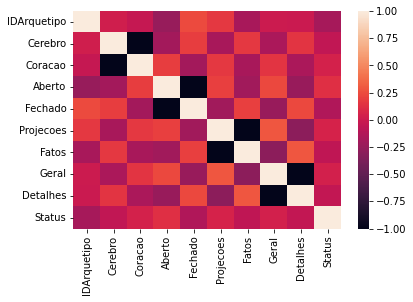

In [12]:
sns.heatmap(df.corr());

### Agrupamento ###

Aplicamos a clusterização para analisar o agrupamentos dos arquétipos quanto a classificação recebida de líder, vice-líder e bandeira. 
Foi utilizado o método do cotovelo e mais para o final o PCa que conseguiu demonstrar melhor esses grupos diminuindo a dimensionalidade dos dados.

In [13]:
df1 = df[['IDArquetipo','Status']]

In [14]:
df1.columns = ['Arquetipo', 'Tipo']

In [15]:
df1.sample(10)

,Arquetipo,Tipo
783,14,3
446,13,2
630,7,3
290,3,2
481,15,2
521,16,2
246,14,1
482,15,2
474,15,2
440,12,2


In [16]:
df1.shape

(798, 2)

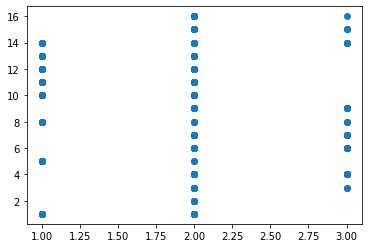

In [17]:
plt.scatter(df1['Tipo'], df1['Arquetipo'])
plt.show()

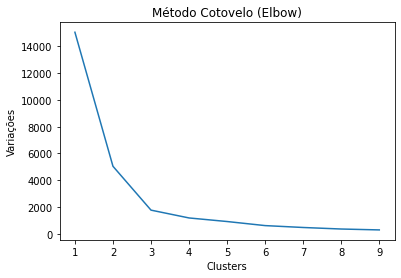

In [18]:
variacoes = []
for i in range(1,10):
    kmeans=KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(df1)
    variacoes.append(kmeans.inertia_)

plt.plot(range(1,10), variacoes)
plt.title('Método Cotovelo (Elbow)')
plt.xlabel('Clusters')
plt.ylabel('Variações')
plt.show()

In [19]:
kmeans_final = KMeans(n_clusters=3)

In [20]:
kmeans_final.fit(df1)

KMeans(n_clusters=3)

In [21]:
cluster_pred = kmeans_final.predict(df1)

In [22]:
cluster_centers = kmeans_final.cluster_centers_

In [23]:
cluster_centers

array([[ 8.51329787,  2.25265957],
       [ 2.96698113,  1.96698113],
       [14.15714286,  1.56666667]])

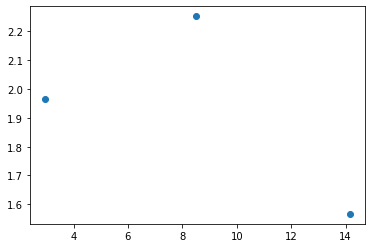

In [24]:
plt.scatter(cluster_centers[:,0], cluster_centers[:,1])

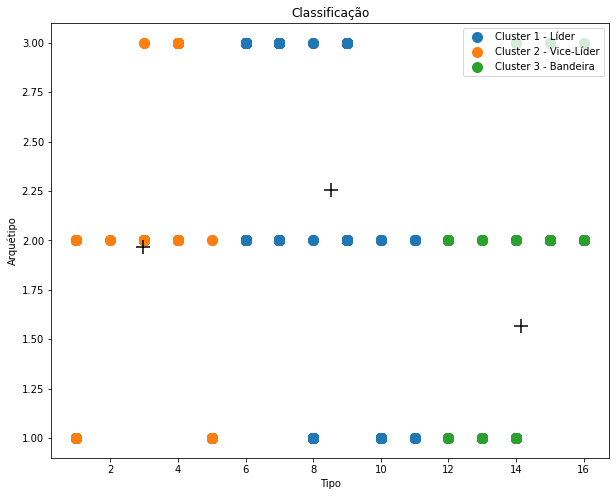

In [25]:
plt.figure(figsize=(10,8))
plt.scatter(df1.values[cluster_pred==0, 0], df1.values[cluster_pred==0, 1],s=100, label='Cluster 1 - Líder')
plt.scatter(df1.values[cluster_pred==1, 0], df1.values[cluster_pred==1, 1],s=100, label='Cluster 2 - Vice-Líder')
plt.scatter(df1.values[cluster_pred==2, 0], df1.values[cluster_pred==2, 1],s=100, label='Cluster 3 - Bandeira')
plt.scatter(cluster_centers[:,0],cluster_centers[:,1], marker='+', s=200, c='black')
plt.legend()
plt.title('Classificação')
plt.xlabel('Tipo')
plt.ylabel('Arquétipo')
plt.show()

In [26]:
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(df1['Arquetipo'], df1['Tipo'], test_size=0.2, random_state=42)

In [27]:
from sklearn.decomposition import PCA
pca = PCA(2)
pca_data = pca.fit_transform(df)
pca_data[:5]

array([[7.51324078, 1.46276075],
       [7.51324078, 1.46276075],
       [7.51324078, 1.46276075],
       [7.51324078, 1.46276075],
       [7.51324078, 1.46276075]])

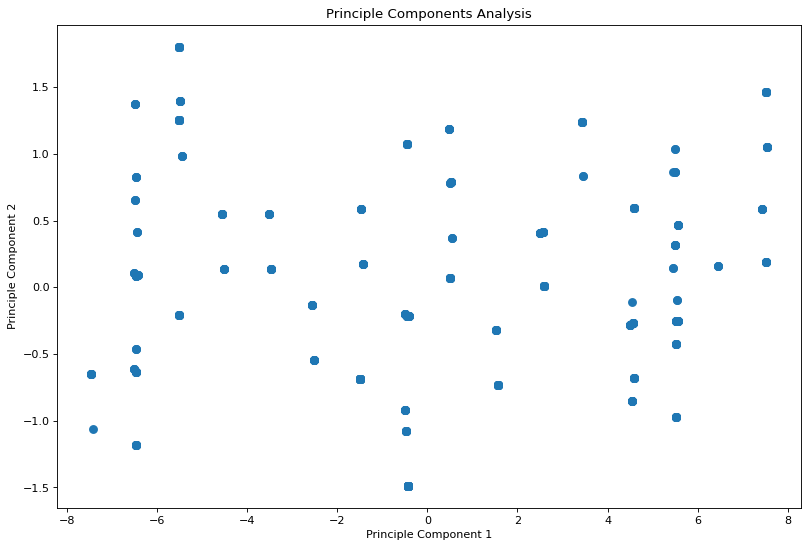

In [28]:
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["figure.dpi"] = 80
plt.scatter(x=pca_data[:,0], y=pca_data[:,1], lw=2)
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.title("Principle Components Analysis")
plt.show()

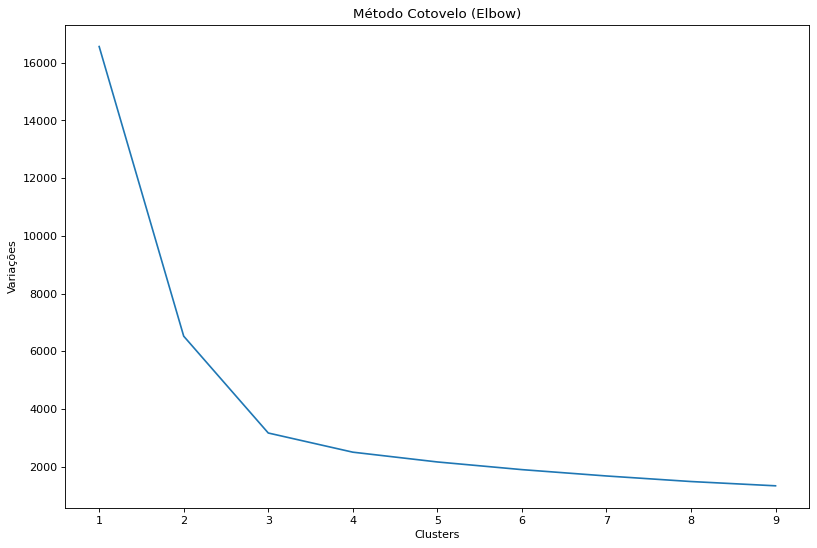

In [29]:
variacoes = []
for i in range(1,10):
    kmeans=KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(df)
    variacoes.append(kmeans.inertia_)

plt.plot(range(1,10), variacoes)
plt.title('Método Cotovelo (Elbow)')
plt.xlabel('Clusters')
plt.ylabel('Variações')
plt.show()

In [30]:
kmeans_final = KMeans(n_clusters=3, init='k-means++', random_state=42)

In [31]:
cluster_pred = pd.Series(kmeans_final.fit_predict(df))
cluster_pred

0      1
1      1
2      1
3      1
4      1
      ..
793    1
794    1
795    1
796    1
797    1
Length: 798, dtype: int32

In [32]:
cluster_pred.value_counts()

0    326
1    262
2    210
dtype: int64

In [33]:
centroids = kmeans_final.cluster_centers_
centroids_pca = pca.transform(centroids)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  "X does not have valid feature names, but"


In [34]:
pca_dataframe = pd.DataFrame(pca_data, columns=["PCA 1", "PCA 2"])
pca_dataframe["Cluster"] = cluster_pred
pca_dataframe.sample(10)

,PCA 1,PCA 2,Cluster
781,-0.457075,1.071772,0
46,3.427477,1.239284,1
398,-0.470390,-1.078309,0
680,-0.435403,-1.487801,0
214,-5.518413,1.803359,2
63,0.531661,0.789753,0
40,7.519368,0.192408,1
199,-5.518413,1.803359,2
752,-0.489310,-0.200269,0
195,-5.518413,1.803359,2


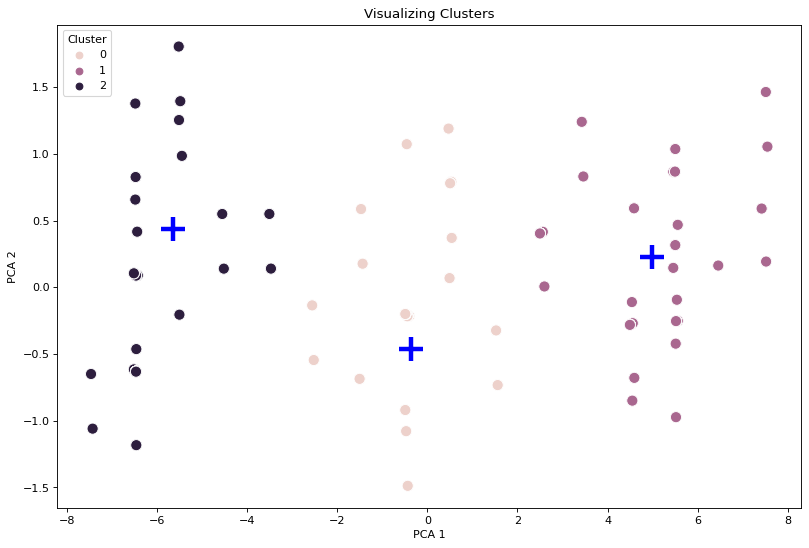

In [35]:
plt.rcParams["figure.dpi"] = 80
sns.scatterplot(x="PCA 1", y="PCA 2", hue="Cluster", data=pca_dataframe, s=100)
plt.scatter(x=centroids_pca[:, 0], y=centroids_pca[:, 1], marker="+", s=500, linewidths=3, lw=4, color="blue", zorder=10)
plt.title("Visualizing Clusters")
plt.show()

### Separar em treino e teste para classificação

Separamos os dados importados em treino e teste a proporção de 80/20 e garantindo que o y esteja homogeneo entre as 3 classificações possíveis,

In [69]:
df.head()

,IDArquetipo,Cerebro,Coracao,Aberto,Fechado,Projecoes,Fatos,Geral,Detalhes,Status
0,1,1,0,1,0,0,1,0,1,1
1,1,1,0,1,0,0,1,0,1,1
2,1,1,0,1,0,0,1,0,1,1
3,1,1,0,1,0,0,1,0,1,1
4,1,1,0,1,0,0,1,0,1,1


In [70]:
df.shape

(798, 10)

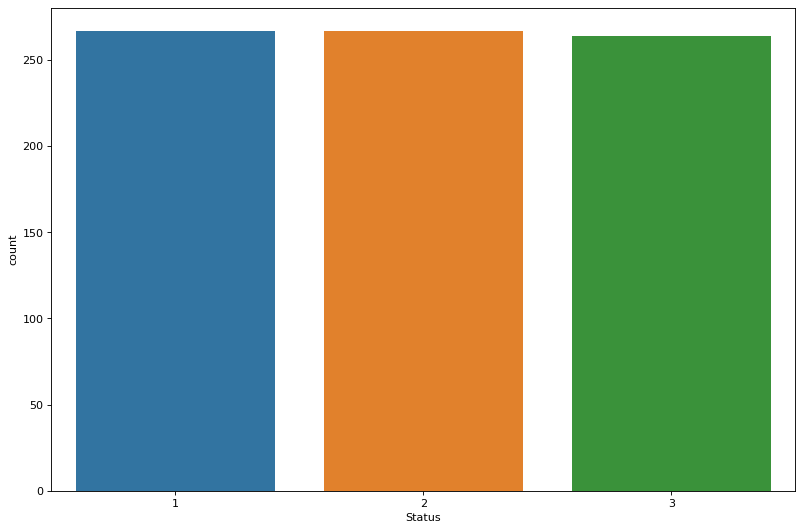

In [71]:
sns.countplot(x=df['Status']);

In [72]:
X = df.iloc[:,0:9]

In [73]:
X.head()

,IDArquetipo,Cerebro,Coracao,Aberto,Fechado,Projecoes,Fatos,Geral,Detalhes
0,1,1,0,1,0,0,1,0,1
1,1,1,0,1,0,0,1,0,1
2,1,1,0,1,0,0,1,0,1
3,1,1,0,1,0,0,1,0,1
4,1,1,0,1,0,0,1,0,1


In [74]:
y = df.iloc[:,9]

In [75]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Status, dtype: int64

In [76]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, stratify=y)

print(len(X_treino))
print(len(X_teste))
print(len(y_treino))
print(len(y_teste))

638
160
638
160


In [77]:
np.unique(y, return_counts=True)

(array([1, 2, 3]), array([267, 267, 264]))

In [78]:
np.unique(y_treino, return_counts=True)

(array([1, 2, 3]), array([214, 213, 211]))

In [79]:
np.unique(y_teste, return_counts=True)

(array([1, 2, 3]), array([53, 54, 53]))

### Teste e acurácia com o Naive Bayes

In [47]:
nb = GaussianNB()

In [48]:
nb.fit(X_treino, y_treino)

GaussianNB()

In [49]:
nb.score(X_teste, y_teste)

0.46875

In [50]:
nbpredGaus = nb.predict(X_teste)

In [51]:
accuracy_score(y_teste, nbpredGaus)

0.46875

In [52]:
f1_score(y_teste, nbpredGaus, average='micro')

0.46875

In [53]:
recall_score(y_teste, nbpredGaus, average='micro')

0.46875

In [54]:
precision_score(y_teste, nbpredGaus, average='micro')

0.46875

In [55]:
cm = confusion_matrix(y_teste,nbpredGaus)
cm

array([[28, 22,  4],
       [17, 27,  9],
       [11, 22, 20]])

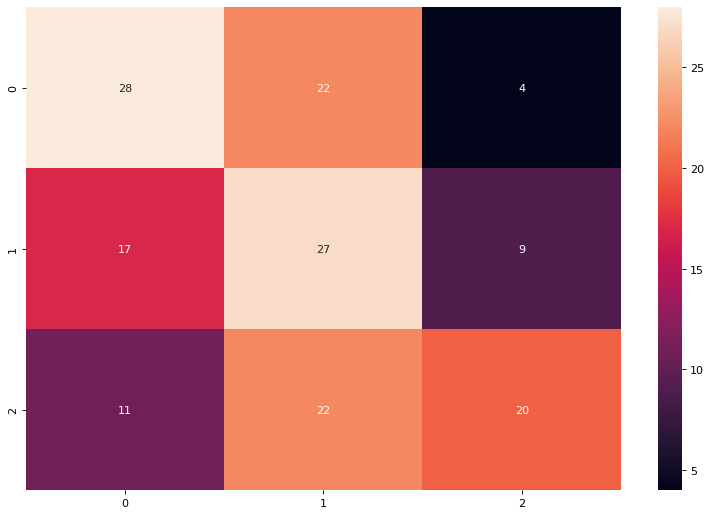

In [56]:
sns.heatmap(cm, annot=True);

Multinomial

In [57]:
nb = MultinomialNB()

In [58]:
nb.fit(X_treino, y_treino)

MultinomialNB()

In [59]:
nb.score(X_teste, y_teste)

0.4125

In [60]:
nbpredMult = nb.predict(X_teste)

In [61]:
accuracy_score(y_teste, nbpredMult)

0.4125

In [62]:
f1_score(y_teste, nbpredMult, average='micro')

0.4125

In [63]:
recall_score(y_teste, nbpredMult, average='micro')

0.4125

In [64]:
precision_score(y_teste, nbpredMult, average='micro')

0.4125

In [65]:
cm = confusion_matrix(y_teste,nbpredMult)
cm

array([[23, 19, 12],
       [16, 26, 11],
       [ 9, 27, 17]])

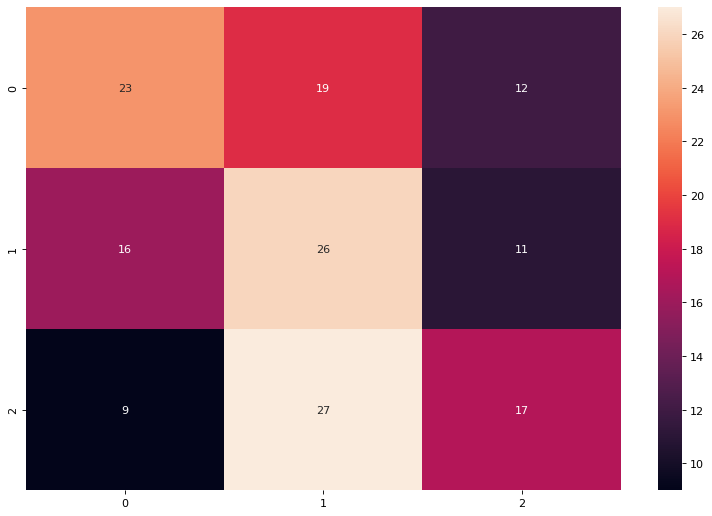

In [66]:
sns.heatmap(cm, annot=True);

### Teste e acurácia com o Random Forest Classifier

In [104]:
rf = RandomForestClassifier(bootstrap=True,
                            class_weight=None, 
                            criterion='gini',
                            max_depth=None, 
                            max_features='auto',
                            max_leaf_nodes=None, 
                            min_impurity_decrease=0.0,
                            min_samples_leaf=1,
                            min_samples_split=2,
                            min_weight_fraction_leaf=0.0, 
                            n_estimators=10, 
                            n_jobs=1, 
                            oob_score=False, 
                            random_state=42, 
                            verbose=0, 
                            warm_start=False
                            )
                            
rf.fit(X_treino, y_treino)

RandomForestClassifier(n_estimators=10, n_jobs=1, random_state=42)

In [105]:
rf.score(X_teste, y_teste)

0.76875

In [106]:
rfpred = rf.predict(X_teste)

In [107]:
accuracy_score(y_teste, rfpred)

0.76875

In [108]:
f1_score(y_teste, rfpred, average='micro')

0.76875

In [109]:
recall_score(y_teste, rfpred, average='micro')

0.76875

In [110]:
precision_score(y_teste, rfpred, average='micro')

0.76875

In [111]:
cm = confusion_matrix(y_teste, rfpred)
cm

array([[44,  9,  0],
       [13, 34,  7],
       [ 2,  6, 45]])

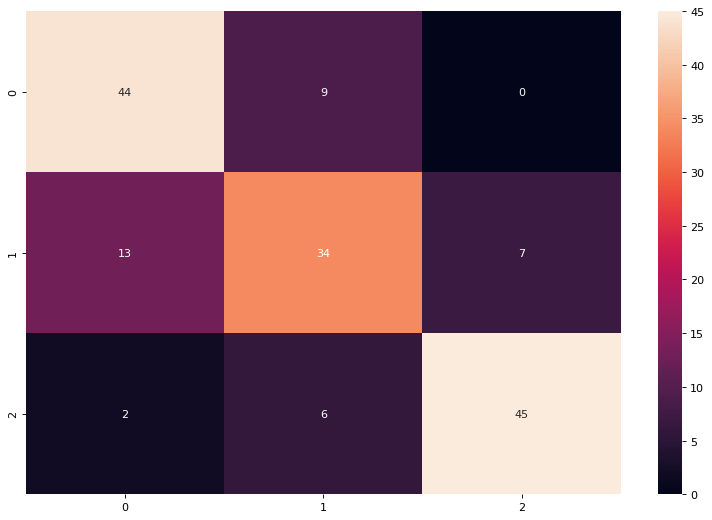

In [112]:
sns.heatmap(cm, annot=True);

### Teste e acurácia com o SVC

In [82]:
param_grid = [
    {'C': [1, 10, 100]}
]
svc = LinearSVC()
svm = GridSearchCV(svc, param_grid).fit(X_treino, y_treino)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

In [83]:
svcpred = svm.predict(X_teste)

In [84]:
accuracy_score(y_teste, svcpred)

0.3

In [85]:
f1_score(y_teste, svcpred, average='micro')

0.3

In [86]:
recall_score(y_teste, svcpred, average='micro')

0.3

In [87]:
precision_score(y_teste, svcpred, average='micro')

0.3

In [88]:
cm = confusion_matrix(y_teste, svcpred)
cm

array([[ 0, 12, 41],
       [ 0, 30, 24],
       [ 0, 35, 18]])

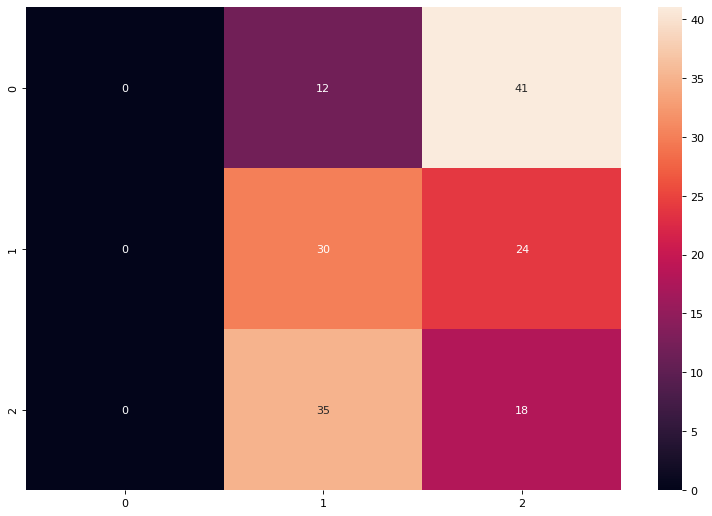

In [89]:
sns.heatmap(cm, annot=True);

### Teste e acurácia com o Gradiente descendente

In [90]:
modelo = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42, max_iter=5, tol=None)
modelo.fit(X_treino, y_treino);

In [91]:
SGDCprev = modelo.predict(X_teste)

In [92]:
accuracy_score(y_teste, SGDCprev)

0.325

In [93]:
f1_score(y_teste, SGDCprev, average='micro')

0.325

In [94]:
recall_score(y_teste, SGDCprev, average='micro')

0.325

In [95]:
precision_score(y_teste, SGDCprev, average='micro')

0.325

In [96]:
cm = confusion_matrix(y_teste,SGDCprev)
cm

array([[ 0, 51,  2],
       [ 0, 52,  2],
       [ 0, 53,  0]])

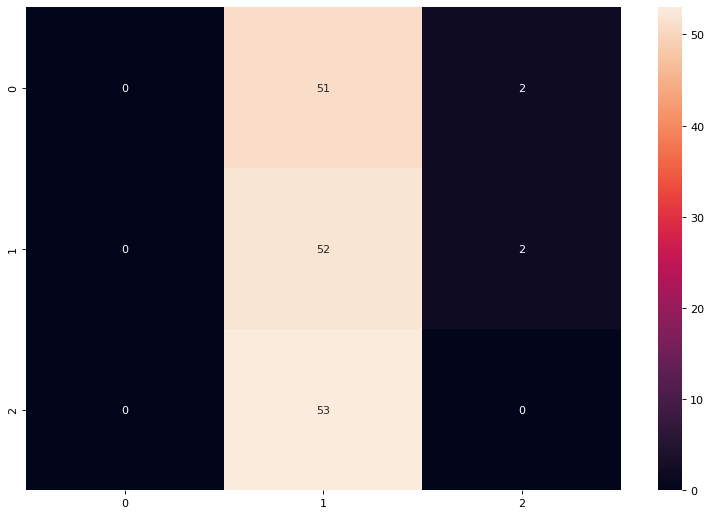

In [97]:
sns.heatmap(cm, annot=True);

## Após as aplicação dos 4 modelos, foi verificado que o Random Forest Classifier foi o que apresentou a melhor taxa de acertos nos dados de teste, sendo assim, ele será utilizado para a confecção da API que será consultado em nosso sistema principal.